In [1]:
import openpyxl
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib
from seaborn_qqplot import pplot
import statsmodels.api as sm 
from scipy.stats import mannwhitneyu

plt.style.use('seaborn')

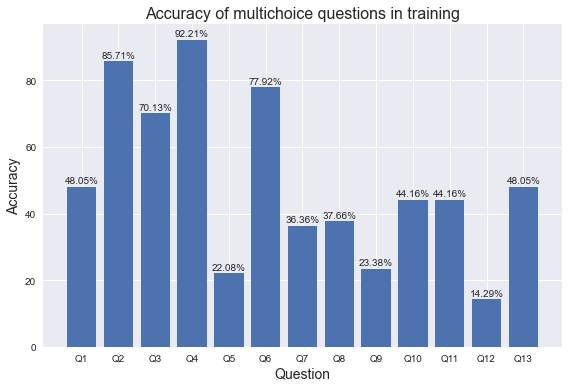

In [2]:
training_data = pd.read_excel(
    'RawData/E4-data-cleaned-entry.xlsx').iloc[1:]
experiment_data = pd.read_excel('RawData/E4-data-cleaned-experiment.xlsx').iloc[1:]
experiment_data['Duration (in seconds)'] = pd.to_numeric(experiment_data['Duration (in seconds)'])

df_train = training_data.iloc[:, 22:35]
wrong_list = [100*(1 - row.isna().sum()/77) for idx,row in df_train.iteritems()]
idx_list = ['Q'+str(i) for i in range(1,14)]

plt.bar(idx_list,wrong_list)
for i in range(len(idx_list)):
    plt.text(i, wrong_list[i] + 1, '{0:.2f}%'.format(wrong_list[i]), ha='center')
plt.title('Accuracy of multichoice questions in training', fontsize=16)
# plt.legend(loc = 'lower right')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Question', fontsize=14)
plt.tight_layout()
plt.savefig('images/train.png')
plt.show()
plt.show()
# .isna().any(axis=0).sum()
        
# sns.violinplot(data=df_time[['Duration (in seconds)', 'Year']], x="Duration (in seconds)", y='Year')

# # Add in points to show each observation
# sns.stripplot(data=df_time[['Duration (in seconds)', 'Year']], x="Duration (in seconds)", y='Year',
#               size=4, color=".3", linewidth=0)
# plt.xlabel('Duration', fontsize=14)
# plt.ylabel('Year', fontsize=14)
# plt.tight_layout()
# plt.savefig('images/duration.png')

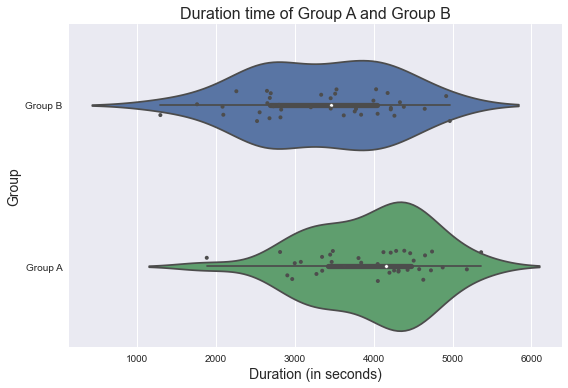

In [3]:
sns.violinplot(data=experiment_data[['Duration (in seconds)','GroupA']], x="Duration (in seconds)", y='GroupA')

# Add in points to show each observation
sns.stripplot(data=experiment_data[['Duration (in seconds)','GroupA']], x="Duration (in seconds)", y='GroupA',
              size=4, color=".3", linewidth=0)
plt.xlabel('Duration (in seconds)', fontsize=14)
plt.ylabel('Group', fontsize=14)
plt.title('Duration time of Group A and Group B', fontsize=16)
plt.tight_layout()
plt.savefig('images/duration.png')

In [4]:
experiment_data[['Duration (in seconds)','GroupA']].groupby('GroupA').agg('mean')

,Duration (in seconds)
GroupA,
Group A,3962.416667
Group B,3336.921053


In [5]:
experiment_data[['Duration (in seconds)','GroupA']].groupby('GroupA').agg('std')

,Duration (in seconds)
GroupA,
Group A,753.594183
Group B,898.868910


C:\Users\thinkpad\AppData\Local\Temp\ipykernel_7280\958990142.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perception['Q36'] = df_perception['Q36'].map(difficulty)


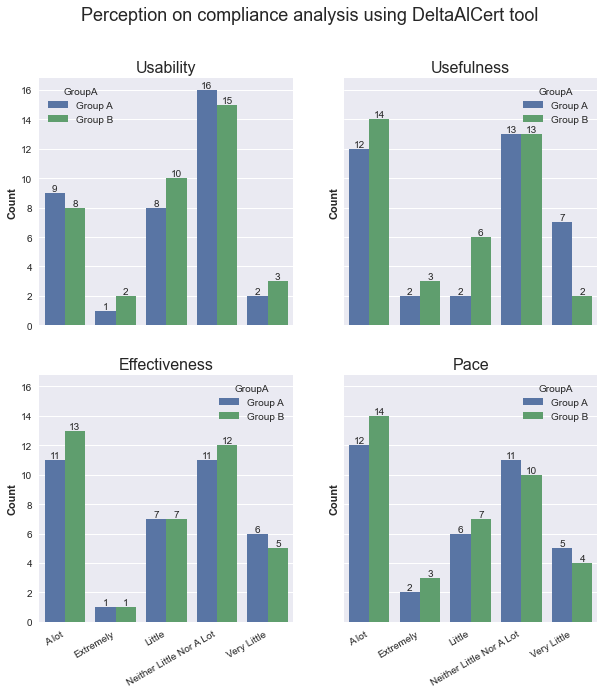

In [6]:
df_perception = experiment_data[['Q36','Q37','Q38','Q42','Q43','Q44','GroupA']]

difficulty = {'Very Easy':'Extremely', 'Easy':'A lot', 'Neither Hard Nor Easy':'Neither Little Nor A Lot', 'Hard':'Little', 'Very Hard':'Very Little'}
df_perception['Q36'] = df_perception['Q36'].map(difficulty)
df_perception_1 = df_perception.groupby(['Q36', 'GroupA']).count()
df_perception_1 = df_perception_1.reset_index()

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True, sharex=True)
fig.suptitle('Perception on compliance analysis using DeltaAlCert tool', fontsize=18)
# sns.set(style="darkgrid")
g1 = sns.barplot(ax=axes[0,0], x='Q36', y="Q37", hue="GroupA", data=df_perception_1, ci=None)
g1.set_title("Usability", fontsize=16)
g1.set_xticklabels(g1.get_xticklabels(), rotation=30, ha='right')
g1.set_xlabel("", fontweight='bold')
g1.set_ylabel("Count", fontweight='bold')
for container in g1.containers:
    g1.bar_label(container, fmt='%.d')


df_perception_2 = df_perception[['Q36','Q37','Q38','Q42','Q43','Q44','GroupA']].groupby(['Q42', 'GroupA']).count()
df_perception_2 = df_perception_2.reset_index()

g2 = sns.barplot(ax=axes[0,1], x='Q42', y="Q37", hue="GroupA", data=df_perception_2, ci=None)
g2.set_title("Usefulness", fontsize=16)
g2.set_xticklabels(g2.get_xticklabels(), rotation=30, ha='right')
g2.set_xlabel("", fontweight='bold')
g2.set_ylabel("Count", fontweight='bold')
for container in g2.containers:
    g2.bar_label(container, fmt='%.d')


df_perception_3 = df_perception[['Q36','Q37','Q38','Q42','Q43','Q44','GroupA']].groupby(['Q37', 'GroupA']).count()
df_perception_3 = df_perception_3.reset_index()

g3 = sns.barplot(ax=axes[1,0], x='Q37', y="Q36", hue="GroupA", data=df_perception_3, ci=None)
g3.set_title("Effectiveness", fontsize=16)
g3.set_xticklabels(g3.get_xticklabels(), rotation=30, ha='right')
g3.set_xlabel("", fontweight='bold')
g3.set_ylabel("Count", fontweight='bold')
for container in g3.containers:
    g3.bar_label(container, fmt='%.d')


df_perception_4 = df_perception[['Q36','Q37','Q38','Q42','Q43','Q44','GroupA']].groupby(['Q38', 'GroupA']).count()
df_perception_4 = df_perception_4.reset_index()

g4 = sns.barplot(ax=axes[1,1], x='Q38', y="Q36", hue="GroupA", data=df_perception_4, ci=None)
g4.set_title("Pace", fontsize=16)
g4.set_xticklabels(g4.get_xticklabels(), rotation=30, ha='right')
g4.set_xlabel("", fontweight='bold')
g4.set_ylabel("Count", fontweight='bold')
for container in g4.containers:
    g4.bar_label(container, fmt='%.d')

plt.show()


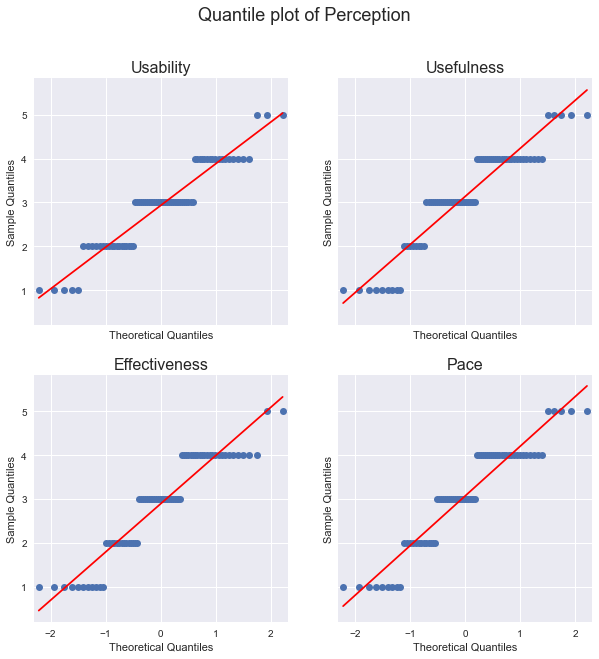

In [7]:
score = {'Extremely':5, 'A lot':4, 'Neither Little Nor A Lot':3, 'Little':2, 'Very Little':1}
df_perception_a = df_perception.where(df_perception.GroupA == 'Group A').dropna()
Q36 = df_perception['Q36'].map(score)
Q37 = df_perception['Q37'].map(score)
Q38 = df_perception['Q38'].map(score)
Q42 = df_perception['Q42'].map(score)

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True, sharex=True)
fig.suptitle('Quantile plot of Perception', fontsize=18)

qq1 = sm.qqplot(np.array(Q36), ax=axes[0,0], line ='s') 
axes[0,0].set_title("Usability", fontsize=16)

qq2 = sm.qqplot(np.array(Q42), ax=axes[0,1], line ='s') 
axes[0,1].set_title("Usefulness", fontsize=16)

qq3 = sm.qqplot(np.array(Q37), ax=axes[1,0], line ='s') 
axes[1,0].set_title("Effectiveness", fontsize=16)

qq4 = sm.qqplot(np.array(Q38), ax=axes[1,1], line ='s') 
axes[1,1].set_title("Pace", fontsize=16)
plt.show()

In [8]:
df_perception_a = df_perception.where(df_perception.GroupA == 'Group A').dropna()
df_perception_b = df_perception.where(df_perception.GroupA == 'Group B').dropna()

720.0 0.34283196210975203


In [9]:
stats.shapiro(df_perception_a.Q36.map(score))

ShapiroResult(statistic=0.8981315493583679, pvalue=0.003034686902537942)

In [10]:
stats.shapiro(df_perception_b.Q36.map(score))

ShapiroResult(statistic=0.9146139025688171, pvalue=0.0067678457126021385)

In [11]:
stats.shapiro(df_perception_a.Q42.map(score))

ShapiroResult(statistic=0.8569014668464661, pvalue=0.0002755041350610554)

In [12]:
stats.shapiro(df_perception_b.Q42.map(score))

ShapiroResult(statistic=0.9014519453048706, pvalue=0.002801832277327776)

In [13]:
stats.shapiro(df_perception_a.Q37.map(score))

ShapiroResult(statistic=0.8894742727279663, pvalue=0.0017809118144214153)

In [14]:
stats.shapiro(df_perception_b.Q37.map(score))

ShapiroResult(statistic=0.8822812438011169, pvalue=0.0008360478095710278)

In [15]:
stats.shapiro(df_perception_a.Q38.map(score))

ShapiroResult(statistic=0.8959996700286865, pvalue=0.002657307079061866)

In [16]:
stats.shapiro(df_perception_b.Q38.map(score))

ShapiroResult(statistic=0.8982193470001221, pvalue=0.002271093428134918)

In [17]:
statistic, pvalue = mannwhitneyu(df_perception_a.Q36.map(score), df_perception_b.Q36.map(score), alternative='greater')
print(statistic, pvalue)

720.0 0.34283196210975203


In [18]:
statistic, pvalue = mannwhitneyu(df_perception_a.Q42.map(score), df_perception_b.Q42.map(score), alternative='greater')
print(statistic, pvalue)

614.5 0.7862758004272252


In [19]:
statistic, pvalue = mannwhitneyu(df_perception_a.Q37.map(score), df_perception_b.Q37.map(score), alternative='greater')
print(statistic, pvalue)

645.5 0.6694212654367515


In [20]:
statistic, pvalue = mannwhitneyu(df_perception_a.Q38.map(score), df_perception_b.Q38.map(score), alternative='greater')
print(statistic, pvalue)

640.0 0.6914643907441214
